In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Data processing and exploration

data sources

https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [6]:
file = tf.keras.utils
raw_df = pd.read_csv('../../../data/credit_card_fraud/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Analyse class imbalance

In [8]:
raw_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [11]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Total: {}\nPositive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Total: 284807
Positive: 492 (0.17% of total)



## feature engineering

### drop time

In [13]:
cleaned_df = raw_df.copy()

cleaned_df.drop(['Time'], axis=1, inplace=True) 
cleaned_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Preprocess amount for huge range

In [14]:
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)

## Train Test Split

In [17]:
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

In [18]:
# Converting DF to arrays
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

In [19]:
# Converting DF to arrays
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)


In [20]:
# find impalance in all 3 sets

print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set:       {test_labels.mean():.4f}')

Average class probability in training set:   0.0017
Average class probability in validation set: 0.0016
Average class probability in test set:       0.0019


This is almost same

## Normalize input Features

In [21]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5) # limit values in an array
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


## Check data distributions

### Positive distribution vs negative distribution

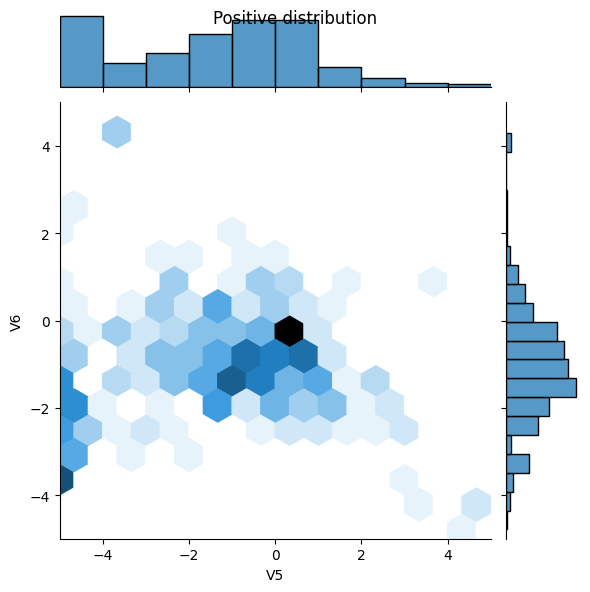

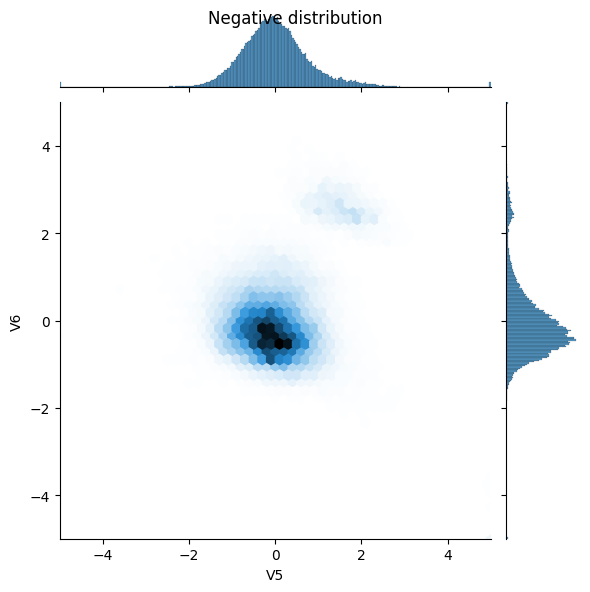

In [22]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['V5'], y=pos_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")


* positive examples contain a much higher rate of extreme values.
* This is looking normal distribution because we have already normalized this

# Model Training

## Define the model

Define a function that creates a simple neural network with a densly connected hidden layer, a dropout layer to reduce overfitting, and an output sigmoid layer that returns the probability of a transaction being fraudulent:

In [23]:
METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

## Build The Model

In [24]:
EPOCHS = 100
BATCH_SIZE = 2048 # higher batch size because smaller batches might not even have any positive sample

early_stopping  = tf.keras.callbacks.EarlyStopping(
    monitor = 'prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True
)


In [26]:
clf = make_model()
clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                480       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
clf.fit(train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_features, val_labels), callbacks=[early_stopping])

Epoch 1/100
90/90 [==============================] - 2s 10ms/step - loss: 1.0473 - cross entropy: 1.0473 - Brier score: 0.3854 - tp: 121.0000 - fp: 122522.0000 - tn: 59442.0000 - fn: 191.0000 - accuracy: 0.3268 - precision: 9.8660e-04 - recall: 0.3878 - auc: 0.3518 - prc: 0.0107 - val_loss: 0.5950 - val_cross entropy: 0.5950 - val_Brier score: 0.2053 - val_tp: 5.0000 - val_fp: 15496.0000 - val_tn: 30000.0000 - val_fn: 68.0000 - val_accuracy: 0.6585 - val_precision: 3.2256e-04 - val_recall: 0.0685 - val_auc: 0.1646 - val_prc: 0.0011
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.5267 - cross entropy: 0.5267 - Brier score: 0.1807 - tp: 91.0000 - fp: 55755.0000 - tn: 126209.0000 - fn: 221.0000 - accuracy: 0.6929 - precision: 0.0016 - recall: 0.2917 - auc: 0.3718 - prc: 0.0237 - val_loss: 0.2588 - val_cross entropy: 0.2588 - val_Brier score: 0.0614 - val_tp: 4.0000 - val_fp: 753.0000 - val_tn: 44743.0000 - val_fn: 69.0000 - val_accuracy: 0.9820 - val_precision: 

# Evaluation

In [29]:
clf.predict(train_features[:10])


1/1 [==============================] - 0s 96ms/step


array([[1.8879249e-09],
       [1.0878518e-09],
       [3.0195304e-05],
       [2.1596925e-08],
       [2.9779009e-08],
       [9.0036373e-10],
       [2.4207955e-07],
       [1.8295914e-07],
       [1.1859150e-06],
       [4.1818927e-07]], dtype=float32)

In [30]:
results = clf.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 0.0037


Lets set a different bias

In [31]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [32]:
clf_1 = make_model(output_bias=initial_bias)
clf_1.fit(train_features, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(val_features, val_labels), callbacks=[early_stopping])
clf_1.predict(train_features[:10])


Epoch 1/100
90/90 [==============================] - 2s 8ms/step - loss: 0.0157 - cross entropy: 0.0097 - Brier score: 0.0015 - tp: 383.0000 - fp: 387.0000 - tn: 363541.0000 - fn: 241.0000 - accuracy: 0.9983 - precision: 0.4974 - recall: 0.6138 - auc: 0.8903 - prc: 0.4227 - val_loss: 0.0061 - val_cross entropy: 0.0061 - val_Brier score: 6.8994e-04 - val_tp: 38.0000 - val_fp: 2.0000 - val_tn: 45494.0000 - val_fn: 35.0000 - val_accuracy: 0.9992 - val_precision: 0.9500 - val_recall: 0.5205 - val_auc: 0.8982 - val_prc: 0.7342
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 0.0080 - cross entropy: 0.0080 - Brier score: 9.8989e-04 - tp: 156.0000 - fp: 41.0000 - tn: 181923.0000 - fn: 156.0000 - accuracy: 0.9989 - precision: 0.7919 - recall: 0.5000 - auc: 0.8843 - prc: 0.5419 - val_loss: 0.0048 - val_cross entropy: 0.0048 - val_Brier score: 5.7332e-04 - val_tp: 47.0000 - val_fp: 3.0000 - val_tn: 45493.0000 - val_fn: 26.0000 - val_accuracy: 0.9994 - val_precision: 0.940

array([[3.00534739e-05],
       [3.90153400e-06],
       [4.11620655e-04],
       [3.19993851e-05],
       [4.59643525e-05],
       [1.33299363e-05],
       [1.39044030e-04],
       [1.09554225e-04],
       [3.15212645e-04],
       [4.01477038e-04]], dtype=float32)

In [33]:
results = clf_1.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 0.0027


# Checkpointing initial weights

In [34]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
clf_1.save_weights(initial_weights)

# Compare model with and without bias initialization

In [35]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [36]:
model = make_model(output_bias=initial_bias)
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [37]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


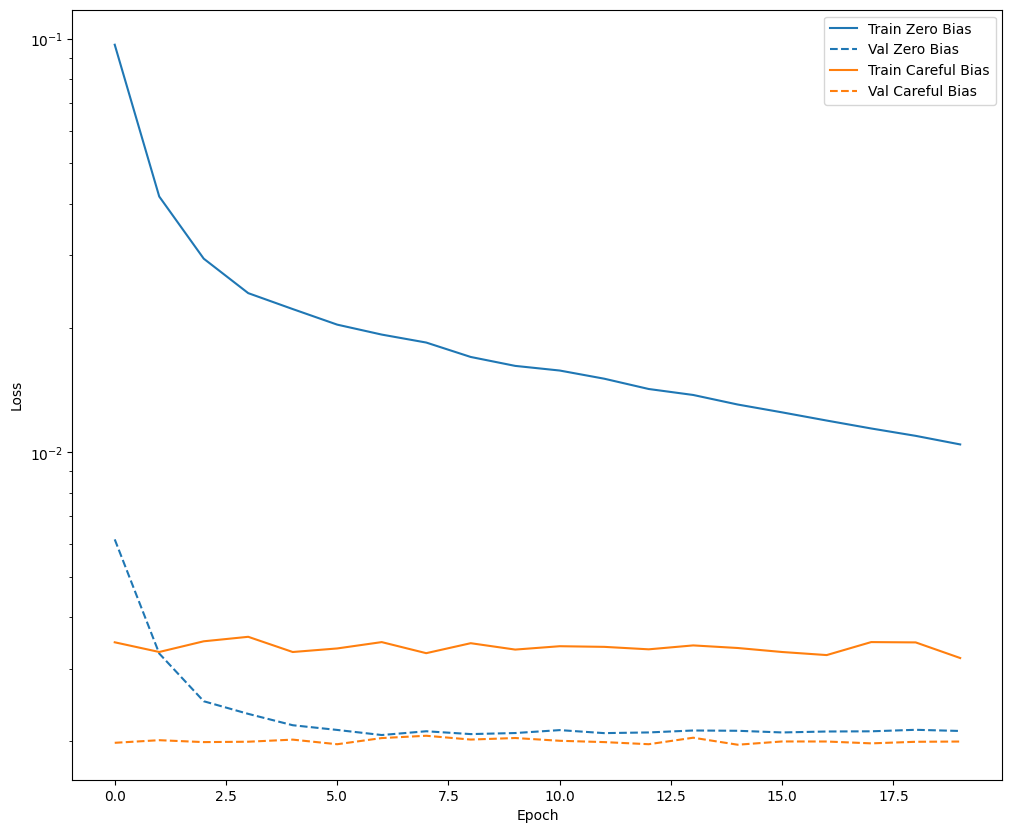

In [38]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [39]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 4ms/step


In [40]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))


loss :  0.003575393930077553
cross entropy :  0.003575393930077553
Brier score :  0.0005901200347580016
tp :  76.0
fp :  7.0
tn :  56848.0
fn :  31.0
accuracy :  0.9993329048156738
precision :  0.9156626462936401
recall :  0.7102803587913513
auc :  0.920197069644928
prc :  0.7950003147125244

Legitimate Transactions Detected (True Negatives):  56848
Legitimate Transactions Incorrectly Detected (False Positives):  7
Fraudulent Transactions Missed (False Negatives):  31
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  107


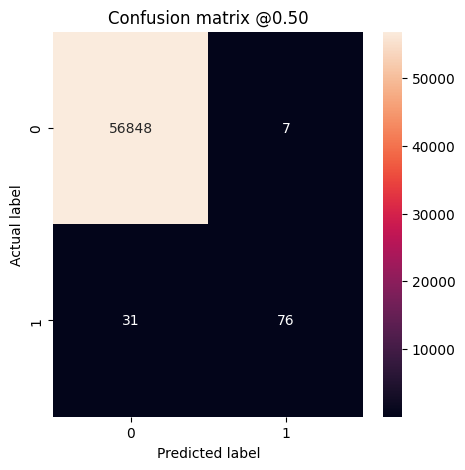

In [41]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)
